In [1]:
from sklearn.cluster import KMeans
import numpy as np

def verify_2sphere(x,y):
    value = x**2 + y**2
    if value <= 1:
        return True
    else:
        return False

In [2]:
import math, random
bola = []
while len(bola) < 1000:
    p = np.random.rand()
    p1 = np.random.rand()
    if p > 0.5:
        x = np.random.rand()
    else:
        x = -np.random.rand()

    y = random.uniform(0, math.sqrt(1 - (x**2)))
#   y = math.sqrt(1 - (x**2))
    if p1 > 0.5:
        y = -y
    if verify_2sphere(x,y):
        bola.append([x,y])

print("Finito")
print(len(bola))

Finito
1000


In [3]:
bola_x = [bola[i][0] for i in range(len(bola))]
bola_y = [bola[i][1] for i in range(len(bola))]

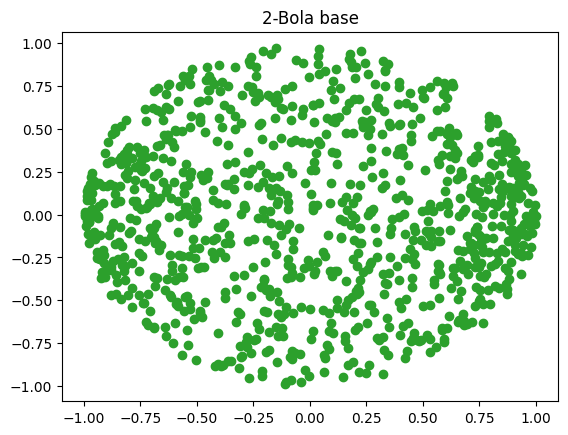

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(bola_x, bola_y, 'o', color = 'tab:green')
plt.title('2-Bola base')
plt.show()

In [49]:
dos_bola = np.array(bola)
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto').fit(dos_bola)

In [29]:
def get_labels(kmeans_labels, clase):
    clase_x = [bola[i] for i in range(len(kmeans_labels)) if kmeans_labels[i] == clase]
    c_x = [_[0] for _ in clase_x]
    c_y = [_[1] for _ in clase_x]
    return c_x, c_y, len(clase_x)

c1_x, c1_y, clase1 = get_labels(kmeans.labels_, 1)
c2_x, c2_y, clase2 = get_labels(kmeans.labels_, 0)

print('Hay {} elementos en la clase 1.'.format(clase1))
print('Hay {} elementos en la clase 2.'.format(clase2))

Hay 495 elementos en la clase 1.
Hay 505 elementos en la clase 2.


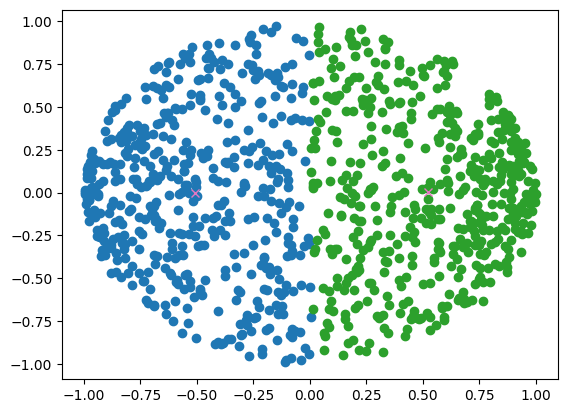

In [28]:
fig, ax = plt.subplots()
ax.plot(c1_x, c1_y, 'o', color = 'tab:blue')
ax.plot(c2_x, c2_y, 'o', color = 'tab:green')
ax.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], 'x', color = 'tab:pink')
ax.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], 'x', color = 'tab:pink')
plt.show()

In [46]:
dos_bola_tagged = [np.append(dos_bola[i], int(kmeans.labels_[i])) for i in range(len(kmeans.labels_))]
dos_bola_tagged[0][2]

0.0

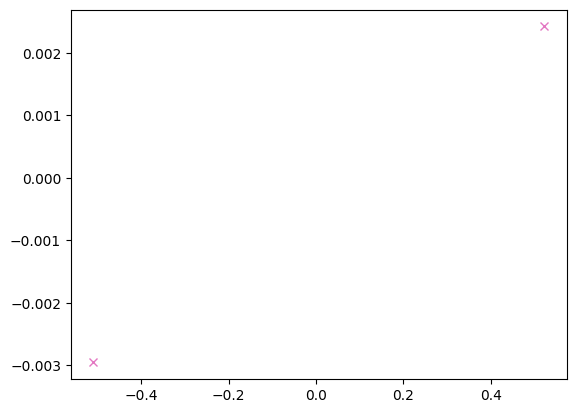

In [39]:
fig, ax = plt.subplots()
for _ in kmeans.cluster_centers_:
    ax.plot(_[0], _[1], 'x', color = 'tab:pink')
for _ in dos_bola_tagged:
    ax.plot(_[0], _[1], 'o', color = ())
plt.show()

Cantidad de clases: 1
Elementos por clase (en orden)
[1000]
------
Cantidad de clases: 2
Elementos por clase (en orden)
[494, 506]
------
Cantidad de clases: 3
Elementos por clase (en orden)
[237, 385, 378]
------
Cantidad de clases: 4
Elementos por clase (en orden)
[210, 287, 280, 223]
------
Cantidad de clases: 5
Elementos por clase (en orden)
[196, 198, 164, 191, 251]
------
Cantidad de clases: 10
Elementos por clase (en orden)
[103, 79, 101, 88, 113, 87, 92, 114, 89, 134]
------


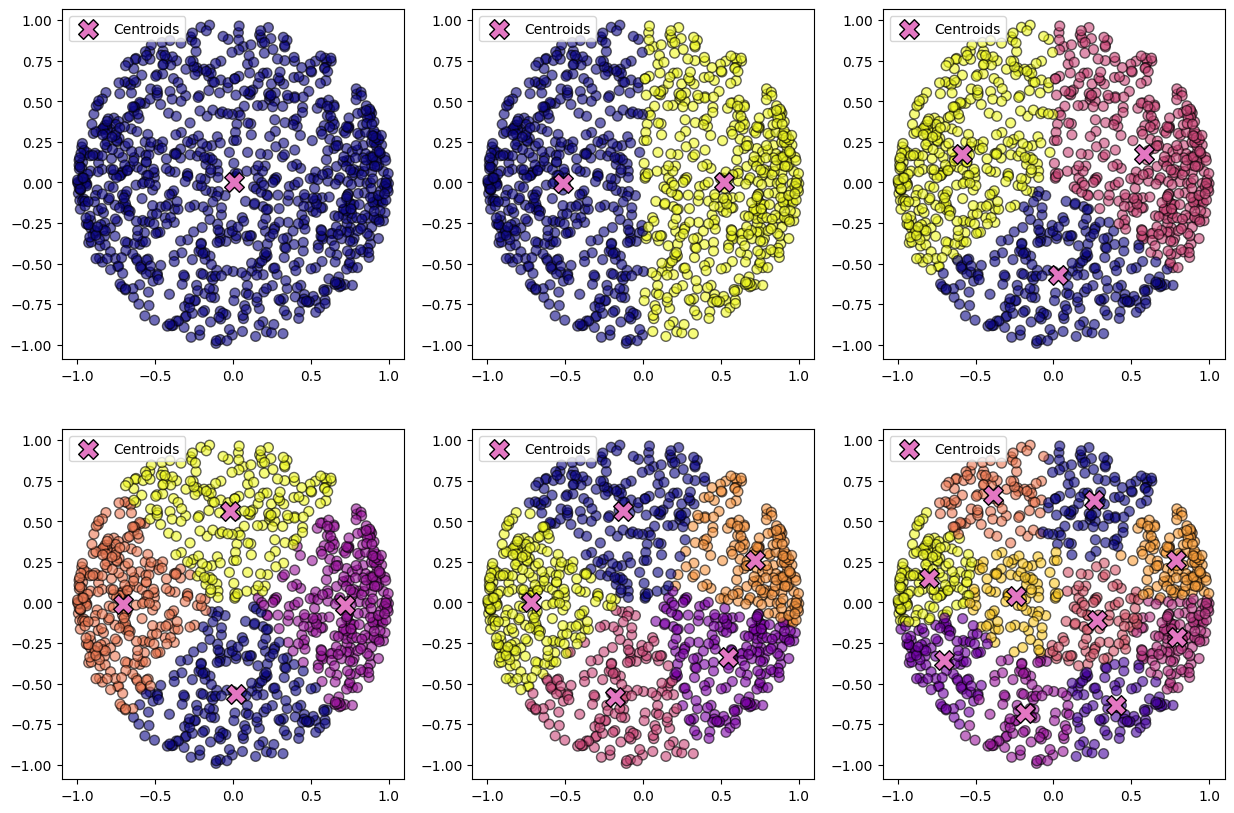

In [76]:
import pandas as pd
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
k_values = [1, 2, 3, 4, 5, 10]
for idx, k in enumerate(k_values):
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(dos_bola)
    centers = kmeans.cluster_centers_

    aux = list(set(list(labels)))
    print('Cantidad de clases: {}'.format(len(aux)))
    cuentas = [list(labels).count(_) for _ in aux]
    print('Elementos por clase (en orden)')
    print(cuentas)
    print('------')
    
    
    # Plot results
    axes[idx].scatter(dos_bola[:, 0], dos_bola[:, 1], c=labels, cmap='plasma', 
                     alpha=0.6, edgecolors='k', s=50)
    axes[idx].scatter(centers[:, 0], centers[:, 1], c='tab:pink', 
                     marker='X', s=200, edgecolors='black', linewidths=1,
                     label='Centroids')
    #axes[idx].set_xlabel('Feature 1')
    #axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()
plt.show()